# Yapay Zeka/Makine Öğrenimi Youtube Videoları Analizi

Bu analiz YouTube'daki eğitici yapay zeka ve makine öğrenimi videolarını belgeleyen ve 6000'den fazla videodan oluşan bir koleksiyon verisinin incelenmesini içerir.

Bu veri seti *kaggle.com* web adresinden CSV dosya formatında temin edilmiştir.

## Veri Setini Hazırlamak

- Pandas kütüphanesini kullanarak dosyayı yüklemek
- Sütun bilgisine ve ait olduğu veri setine genel bir bakış

In [1]:
dosya_ismi = 'AI_ML_YT_Videos.csv'    

In [2]:
f = open(dosya_ismi, 'r')

In [3]:
f.readlines()[:5]              # Ham verilerin ilk 5 satırını gösterir

[',Channel,Title,PublishedDate,Views,Likes,Comments\n',
 '0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),2023-10-27,764,45,1\n',
 '1,Jeff Heaton,"Time Series Data Encoding for Deep Learning, PyTorch (10.1)",2023-10-26,530,31,1\n',
 '2,Jeff Heaton,Bayesian Hyperparameter Optimization for PyTorch (8.4),2023-10-25,453,29,1\n',
 '3,Jeff Heaton,Creating Certificates to Deploy PyInstaller PyQT MacOS App to the Apple App Store,2023-10-17,439,12,0\n']

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('AI_ML_YT_Videos.csv', index_col=0)

In [6]:
df.head()  # ilk 5 satırın gösterilmesi

,Channel,Title,PublishedDate,Views,Likes,Comments
0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),2023-10-27,764,45,1
1,Jeff Heaton,"Time Series Data Encoding for Deep Learning, P...",2023-10-26,530,31,1
2,Jeff Heaton,Bayesian Hyperparameter Optimization for PyTor...,2023-10-25,453,29,1
3,Jeff Heaton,Creating Certificates to Deploy PyInstaller Py...,2023-10-17,439,12,0
4,Jeff Heaton,How Should you Architect Your PyTorch Neural N...,2023-10-12,825,39,1


In [7]:
df['PublishedDate'] = pd.to_datetime(df['PublishedDate'])   # Tarih-saat formatına çevirme

In [8]:
df.dtypes

Channel                  object
Title                    object
PublishedDate    datetime64[ns]
Views                     int64
Likes                     int64
Comments                  int64
dtype: object

Veri seti hakkında genel bilgi elde etmeye çalışırsak;

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6151 entries, 0 to 6150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Channel        6151 non-null   object        
 1   Title          6151 non-null   object        
 2   PublishedDate  6151 non-null   datetime64[ns]
 3   Views          6151 non-null   int64         
 4   Likes          6151 non-null   int64         
 5   Comments       6151 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 336.4+ KB


In [10]:
df.describe()      # Veri setindeki her sütuna dair bazi istatistiklerin alınması

,PublishedDate,Views,Likes,Comments
count,6151,6.151000e+03,6151.000000,6151.000000
mean,2019-02-18 20:37:43.827019776,5.220895e+04,935.637132,72.171029
min,2006-10-25 00:00:00,0.000000e+00,0.000000,0.000000
25%,2017-07-07 00:00:00,5.017500e+03,83.000000,7.000000
50%,2019-09-08 00:00:00,1.660600e+04,313.000000,27.000000
75%,2021-05-27 00:00:00,5.211650e+04,926.000000,80.000000
max,2023-10-27 00:00:00,2.689040e+06,64750.000000,3478.000000
std,NaN,1.180318e+05,2243.596155,144.250349


Veri setinin eksik bir değere sahip olup olmadığını kontrol etme:

In [11]:
df.isna().sum()           # Eksik bir değere sahip değiliz

Channel          0
Title            0
PublishedDate    0
Views            0
Likes            0
Comments         0
dtype: int64

### izleyenlerin ilgisini en çok çeken videoların analizinin yapılması:

Artan oranda sıralanmış bir şekilde en çok yorum alan son 5 video:

In [12]:
df.sort_values('Comments').tail()      

,Channel,Title,PublishedDate,Views,Likes,Comments
5898,Krish Naik,AI VS ML VS DL VS Data Science,2019-11-26,2689040,64750,1697
2034,Nicholas Renotte,Real Time Face Mask Detection with Tensorflow ...,2020-11-01,230058,4275,1808
1410,Siraj Raval,My Apology,2019-12-23,264825,6804,2031
2033,Nicholas Renotte,Real Time Sign Language Detection with Tensorf...,2020-11-05,487193,9607,2603
1996,Nicholas Renotte,Tensorflow Object Detection in 5 Hours with Py...,2021-04-09,1204202,30536,3478


Nicholas Renotte'nin 3478 adet ile en çok yorumu aldığını görüyoruz. Izlenme ve yorum sayısı bu videounun ilgi çekiçi olduğu hakkında bir fikir veriyor. Peki bir de izlenme başına yorum oranı analizi yaptığımızda ortaya çıkacak sonucu inceleyelim.

In [13]:
df['Comments/Views'] = df.Comments / df.Views

Varsa geçersiz değerlerin kaldırılarak artan sırada son 5 veriye ait bilgi:

In [14]:
df.sort_values('Comments/Views').dropna().tail()   

,Channel,Title,PublishedDate,Views,Likes,Comments,Comments/Views
238,Jeff Heaton,GTC GPU Technology Conference Giveaway,2020-09-14,798,49,37,0.046366
831,Daniel Bourke,"My Experience at CodeCamp, Intro to Keras and ...",2018-01-14,733,24,38,0.051842
806,Daniel Bourke,"Facebook F8 Event Highlights, Amazon Sharehold...",2018-05-08,254,15,14,0.055118
765,Daniel Bourke,2018: Thank you,2018-12-31,674,74,46,0.068249
363,Jeff Heaton,What do YOU Want Covered in my Deep Learning C...,2019-04-26,388,41,42,0.108247


Jeff Heaton *'What do YOU Want Covered in my Deep Learning C...'* videosu ile izlenme başına en çok yorumu aldığını görüyoruz. 	

Veya yukarıdaki analizin tersini yaparsak; yani yorum başına izlenme oranı:

In [15]:
df['Views/Comments'] = df.Views / df.Comments

In [16]:
df.sort_values('Views/Comments').dropna().head()   # bu defa ilk 5 sırayı alarak en düşük orana bakmak istiyoruz.

,Channel,Title,PublishedDate,Views,Likes,Comments,Comments/Views,Views/Comments
363,Jeff Heaton,What do YOU Want Covered in my Deep Learning C...,2019-04-26,388,41,42,0.108247,9.238095
765,Daniel Bourke,2018: Thank you,2018-12-31,674,74,46,0.068249,14.652174
806,Daniel Bourke,"Facebook F8 Event Highlights, Amazon Sharehold...",2018-05-08,254,15,14,0.055118,18.142857
831,Daniel Bourke,"My Experience at CodeCamp, Intro to Keras and ...",2018-01-14,733,24,38,0.051842,19.289474
238,Jeff Heaton,GTC GPU Technology Conference Giveaway,2020-09-14,798,49,37,0.046366,21.567568


Yukarıdaki analiz ilk sıradaki videoya dair 1 yorum yapabilmek için 9 görüntülenmenin olması gerektigini söyler ki bu ondalıklı veri sunan bir önceki analize göre biraz daha açıklayıcı bir veri sunuyor. Yani yukarıda ilk beş satır halinde sıralanmıs veriler bize bir başka açıdan en ilgi çekici videoların bilgisini sunar.

### Her yıl yayınlanan videoların sayısını bulmak ve  grafik olarak göstermek:

In [17]:
from pylab import plt, mpl
plt.style.use('ggplot')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [18]:
df.PublishedDate.head()

0   2023-10-27
1   2023-10-26
2   2023-10-25
3   2023-10-17
4   2023-10-12
Name: PublishedDate, dtype: datetime64[ns]

In [19]:
df[['Channel', 'Title', 'PublishedDate']].sample(5)  # videoların yayınladığı tarihlerle ilgili rastgele 5 örnek 

,Channel,Title,PublishedDate
5532,Krish Naik,Live Q&A Data Science With Sudhanshu Kumar Part 2,2020-07-22
3150,DeepLearningAI,Logistic Regression (C1W2L02),2017-08-25
4473,Sentdex,Honda s2000 Texas World Speedway Oct 27th 2012,2013-06-15
3217,DeepLearningAI,Understanding Exponentially Weighted Averages ...,2017-08-25
5739,Krish Naik,End to End Chatbot with Deployment And Custom ...,2020-03-27


In [20]:
df.PublishedDate.dt.year.value_counts().sort_index()    # her yıla ait değeri indeks sırasına göre sayar

PublishedDate
2006      2
2008      8
2009    105
2010     13
2011      3
2013    283
2014    231
2015    202
2016    512
2017    711
2018    521
2019    696
2020    946
2021    856
2022    675
2023    387
Name: count, dtype: int64

Bir çizgi grafiği olarak görselleştirirsek;

<Axes: title={'center': 'Yıllara Göre Video Sayısı'}, xlabel='PublishedDate', ylabel='Video Sayısı'>

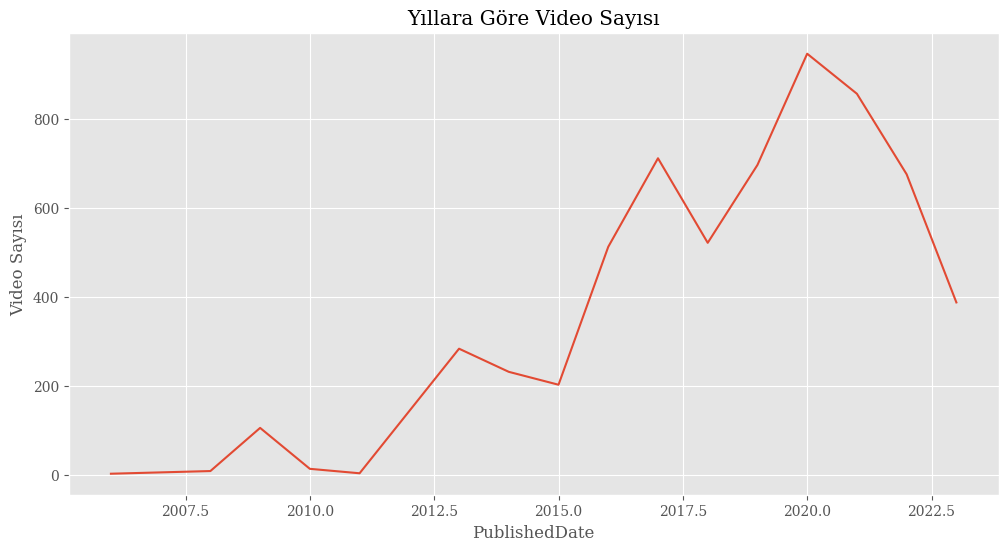

In [21]:
df.PublishedDate.dt.year.value_counts().sort_index().plot(figsize=(12,6), ylabel='Video Sayısı',
                                                         title= 'Yıllara Göre Video Sayısı')         

In [22]:
df.PublishedDate.max()

Timestamp('2023-10-27 00:00:00')

2023 senesine ait eksik verilerimiz olduğu için grafik aşağı doğru azalma eğiliminde

### Şimdi izleyiciler tarafından takdir görmüş en iyi kanalları bulmaya çalışalım:

In [23]:
df.Channel.value_counts()       # her kanala ait video adedini sayar

Channel
Krish Naik                              1669
Sentdex                                 1248
Jeff Heaton                              607
Applied AI Course                        519
Siraj Raval                              469
Artificial Intelligence — All in One     413
DeepLearningAI                           392
Nicholas Renotte                         304
Daniel Bourke                            300
Jeremy Howard                            185
DeepLearning.TV                           32
Arxiv Insights                            13
Name: count, dtype: int64

Bir bar grafiğini çizersek;

<Axes: title={'center': 'Her bir kanalın video sayısı'}, xlabel='Channel', ylabel='Video Sayısı'>

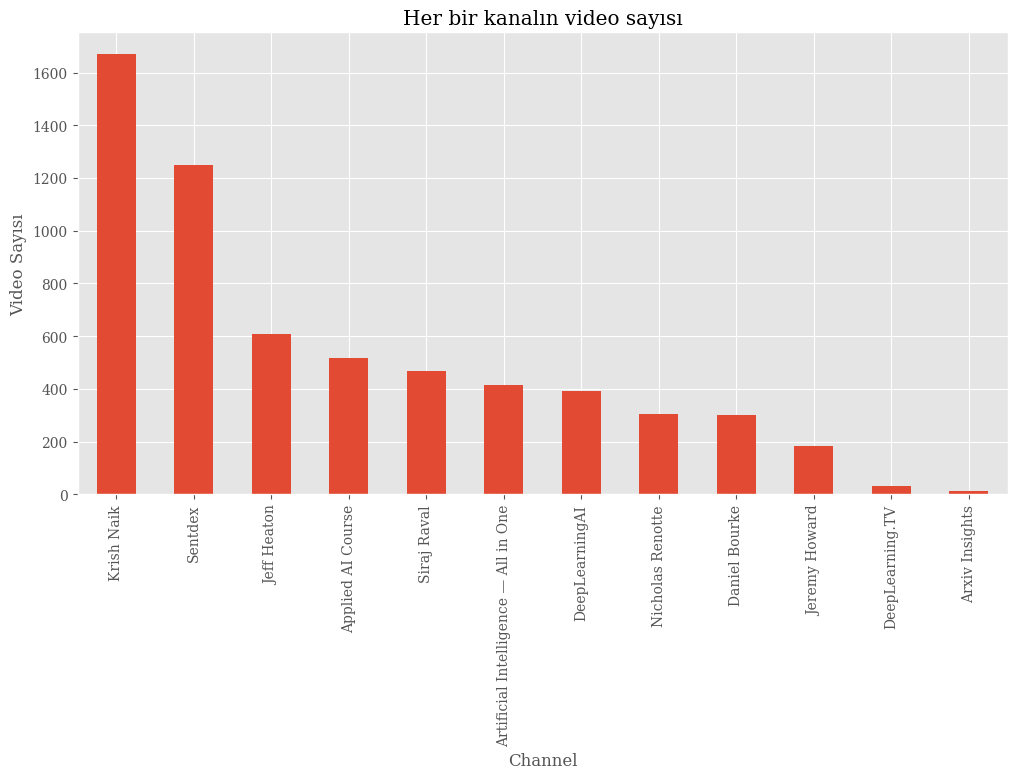

In [24]:
df.Channel.value_counts().plot(kind='bar', ylabel='Video Sayısı', title='Her bir kanalın video sayısı', 
                               figsize=(12,6))

Her kanalı grup haline getirerek görüntülenme sayılarını alıp kanal adedi ve ortalamaya göre artan değerde son 5 veriden bir sütun yapmak istersek;

In [25]:
df.groupby('Channel').Views.agg(['count', 'mean']).sort_values('mean').tail()  

,count,mean
Channel,,
Krish Naik,1669,50111.200120
Sentdex,1248,89871.141827
Siraj Raval,469,106192.102345
DeepLearning.TV,32,136738.093750
Arxiv Insights,13,167996.846154


Görülüyor ki *'Arxiv Insights'* video başına yaklaşık 168 bin görüntülenmeye sahip ancak yalnızca 13 adet videodan bahsediyoruz ki güveneceğimiz bir sonuç olmayacaktır.

Toplam izlenme sayısı en fazla olan kanallara bir göz atalım. Toplama göre artan sırayla son 5 veri için bir sıralama yaparsak;

In [26]:
df.groupby('Channel').Views.agg(['count', 'mean', 'sum']).sort_values('sum').tail()  

,count,mean,sum
Channel,,,
Nicholas Renotte,304,43603.430921,13255443
DeepLearningAI,392,40498.301020,15875334
Siraj Raval,469,106192.102345,49804096
Krish Naik,1669,50111.200120,83635593
Sentdex,1248,89871.141827,112159185


Burada da *'Sentdex'* isimli kanalın 1248 adet video ile 112 milyonluk toplam izlenme sayısına ulaştığını görüyoruz.

Toplam beğeni sayısı en fazla olan kanallara yine son 5 verisi için göz atarsak;

In [27]:
df.groupby('Channel').Likes.agg(['count', 'mean', 'sum']).sort_values('sum').tail() 

,count,mean,sum
Channel,,,
Daniel Bourke,300,736.570000,220971
Nicholas Renotte,304,1367.638158,415762
Siraj Raval,469,2433.061834,1141106
Sentdex,1248,1063.343750,1327053
Krish Naik,1669,1214.147394,2026412


*Krish Naik* isimli kanalin 1669 video ve  2 milyonun üzerinde beğeni ile ilk sıraya yükseldiğini görüyoruz.

### Şimdi de mevcut videolar içerisinde en çok seyredilen konu başlığını ve hangi kanala ait olduğunu bulmaya çalışalım:

In [28]:
df.head()

,Channel,Title,PublishedDate,Views,Likes,Comments,Comments/Views,Views/Comments
0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),2023-10-27,764,45,1,0.001309,764.0
1,Jeff Heaton,"Time Series Data Encoding for Deep Learning, P...",2023-10-26,530,31,1,0.001887,530.0
2,Jeff Heaton,Bayesian Hyperparameter Optimization for PyTor...,2023-10-25,453,29,1,0.002208,453.0
3,Jeff Heaton,Creating Certificates to Deploy PyInstaller Py...,2023-10-17,439,12,0,0.000000,inf
4,Jeff Heaton,How Should you Architect Your PyTorch Neural N...,2023-10-12,825,39,1,0.001212,825.0


In [29]:
df.Views.max()        # En cok seyredilen videonun seyirci sayısı

2689040

izlenme sayılarına ait verileri artan bir sıraya göre son 5 satır halinde yeniden düzenleme:

In [30]:
df.sort_values('Views').tail()      

,Channel,Title,PublishedDate,Views,Likes,Comments,Comments/Views,Views/Comments
2491,Applied AI Course,Prakhar Raj Become Data Scientist at Simpl | D...,2020-12-22,1605793,449,27,0.000017,59473.814815
6016,Krish Naik,How To Learn Data Science Smartly?,2019-08-22,1617866,51816,1280,0.000791,1263.957813
5458,Krish Naik,Complete Road Map To Be Expert In Python- Foll...,2020-09-18,1640772,18240,461,0.000281,3559.158351
3754,Sentdex,Practical Machine Learning Tutorial with Pytho...,2016-04-11,2665790,26085,1007,0.000378,2647.259186
5898,Krish Naik,AI VS ML VS DL VS Data Science,2019-11-26,2689040,64750,1697,0.000631,1584.584561


Bu analizde ise  *'Krish Naik'* isimli kanalın *'AI VS ML VS DL VS Data Science'* konu başlıklı bir video ile en çok seyredilerek 2.6 milyonun üzerinde bir izlenme sayısına ulaştığı sonucuna variyoruz. Onu yine yakın bir izlenme sayısıyla *'Sentdex'* isimli kanal takip etmektedir. 	